#  fashion_mnist in Tensorflow for Deep Learning

Written by: M.Danish Azeem\
Date: 02.12.2024\
Email: danishazeem365@gmail.com

In [4]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [7]:
# summarize loaded dataset
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_train.shape, y_train.shape))

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(60000, 28, 28), y=(60000,)


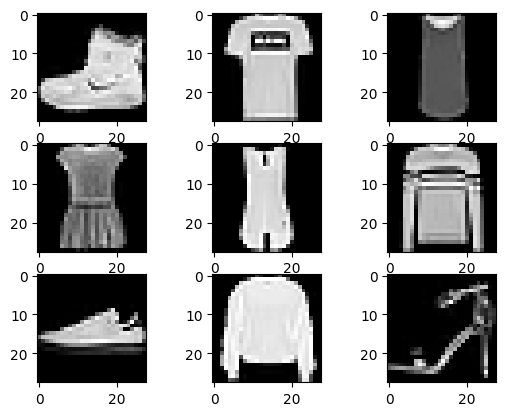

In [8]:
# plot first few images
import matplotlib.pyplot as plt
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [9]:
# preprosess the data by normalizing it
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5


1875/1875 [==============================] - 16s 3ms/step - loss: 0.4962 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8861
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8750
Test accuracy: 0.875


In [14]:
# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8956
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2674 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9026
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2491 - accuracy: 0.9070
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9117
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2323 - accuracy: 0.9134
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2251 - accuracy: 0.9155
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2185 - accuracy: 0.9179
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9215
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3296 

In [15]:
# Make the predictions with the model
predictions = model.predict(x_test)

# Print the shape of the predictions Array
print(predictions.shape)

# Print the firt 10 predictions
print(predictions[:10])

# Convert the predictions to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# Print the first 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[4.20161723e-06 7.34025200e-13 3.99931182e-08 6.07571177e-14
  7.86034154e-11 2.07935391e-05 2.48113530e-09 3.94178648e-03
  1.94154417e-08 9.96033132e-01]
 [4.19206881e-05 3.81592327e-13 9.98533607e-01 3.74821806e-11
  1.38940709e-03 3.10161376e-11 3.49721340e-05 2.16834927e-12
  1.70291088e-08 1.94567818e-13]
 [2.34882200e-11 1.00000000e+00 6.31666054e-15 5.40251732e-10
  8.75555184e-11 1.84463801e-21 3.76269285e-12 4.60680822e-23
  1.76947022e-16 7.37054309e-20]
 [4.41385366e-11 1.00000000e+00 3.59997473e-14 1.86615328e-08
  7.54607987e-10 8.72758471e-19 1.31317859e-10 5.95941135e-19
  2.40039976e-13 3.23272242e-15]
 [1.93096444e-01 1.81549539e-10 2.28284951e-02 6.99631928e-04
  4.67943726e-03 1.06709003e-05 7.78685153e-01 8.72719781e-08
  1.41336400e-07 5.59475444e-09]
 [1.96855581e-07 9.99999523e-01 1.23305435e-10 2.15086246e-07
  1.24032118e-08 1.93777051e-16 1.43835885e-08 6.44043083e-20
  8.74111710e-13 1.82369

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5088 - accuracy: 0.8221 - val_loss: 0.3995 - val_accuracy: 0.8585
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8628 - val_loss: 0.3563 - val_accuracy: 0.8705
Epoch 3/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3450 - accuracy: 0.8739 - val_loss: 0.3082 - val_accuracy: 0.8892
Epoch 4/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3201 - accuracy: 0.8834 - val_loss: 0.2975 - val_accuracy: 0.8902
Epoch 5/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3013 - accuracy: 0.8894 - val_loss: 0.2879 - val_accuracy: 0.8939
Epoch 6/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2844 - accuracy: 0.8943 - val_loss: 0.2596 - val_accuracy: 0.9051
Epoch 7/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2738 - accuracy: 0.8987 - val_loss: 0.2574 - val_accuracy:

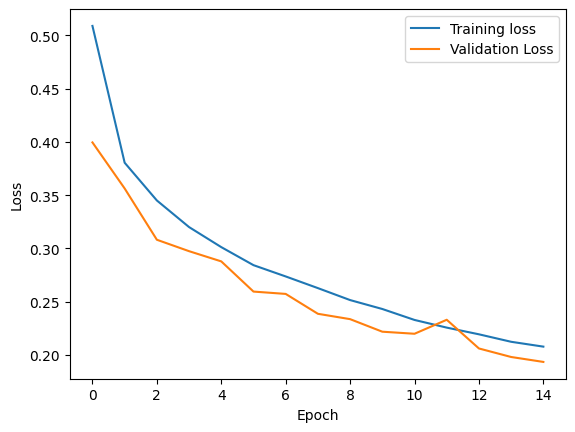

In [21]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# preprosess the data by normalizing it
x_train = x_train / 255.0
x_test = x_test / 255.0

# split the data into training and validation sets
x_val = x_train[5000:]
y_val = y_train[5000:]
x_train = x_train[5000:]
y_train = y_train[5000:]

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



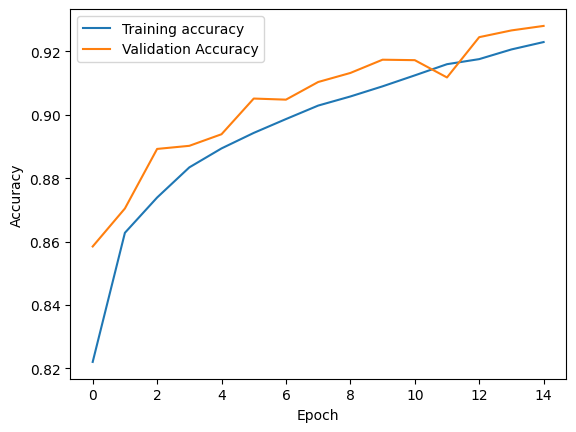

In [22]:
# Plot the training and validation accracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [23]:
# Evalute the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test accuracy:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8814
Test accuracy: 0.8813999891281128
Test accuracy: 0.3412514925003052


whey we use assert in this code:                                                                                                              assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

I'd be glad to explain why `assert` is used in the code snippet you provided, incorporating insights from the feedback and addressing potential issues:

**Purpose of `assert` in the Code:**

- **Data Shape Verification:** The `assert` statements serve as essential sanity checks to ensure that the `x_train`, `x_test`, `y_train`, and `y_test` NumPy arrays in your code have the expected shapes. This is crucial for several reasons:
    - **Preventing Errors:** By verifying the shapes early on, you can catch potential errors caused by mismatched or incorrect data before they cause unexpected behavior later in your code. This can significantly improve debugging efficiency and prevent runtime issues.
    - **Model Compatibility:** Many machine learning models, such as convolutional neural networks (CNNs), have specific input and output shape requirements. Using `assert` statements helps guarantee that your data aligns with the model's expectations, preventing compatibility issues and ensuring consistent results.
    - **Maintaining Code Clarity:** Explicitly stating the assumptions about the data's shape makes the code more readable and understandable for yourself and others who might work with it in the future.

**Common Use Cases of `assert`:**

- **Precondition Assertions:** These verify that certain conditions hold true before a function or code block executes. In your case, they ensure that the input data has the right shapes before being passed to a model or further processing.
- **Postcondition Assertions:** These verify that certain conditions hold true after a function or code block executes, often to check if changes or computations were performed correctly.
- **Debugging:** Assertions can be used to catch specific bugs or unexpected behavior during development.

**Additional Considerations:**

- **Overuse of `assert`:** While `assert` is valuable, it's important to use it judiciously. Too many assertions can impact code performance, especially in production environments. Consider using more robust error handling mechanisms for critical parts of your code.
- **Clarity and Context:** Always include clear error messages in your assertions to aid debugging. Provide information about the expected shapes and why they are necessary.

**Examples:**

```python
# Clearer error message:
assert x_train.shape == (60000, 28, 28), "x_train has unexpected shape! Expected (60000, 28, 28), got %s." % x_train.shape

# Precondition assertion for a function:
def process_data(data):
    assert data.shape[1] == 28, "Data needs 28 features in second dimension, got %d." % data.shape[1]
    # ... rest of the function

# Postcondition assertion after data manipulation:
data = reshape_data(data)
assert data.shape == (10000, 784), "Reshaped data has unexpected shape! Expected (10000, 784), got %s." % data.shape
```

I hope this comprehensive explanation addresses your query effectively!

explain this code
or i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()    

I'd be glad to explain the code you provided:

**Purpose:**

This code snippet displays nine images from the `x_train` dataset as a grid using Matplotlib.

**Breakdown:**

1. **`for i in range(9):`**:
   - This line creates a loop that iterates nine times from `i = 0` to `i = 8`.

2. **`plt.subplot(330 + 1 + i)`**:
   - Inside the loop, this line defines a subplot within a figure for each image.
   - The syntax `330 + 1 + i` creates a unique subplot identifier:
     - `330` sets the base numbering, ensuring separate grids for multiple calls.
     - `1` is added for starting with subplot 1 (not 0).
     - `i` increments the identifier for each loop iteration, placing images in a 3x3 grid.

3. **`plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))`**:
   - This line displays the image data:
     - `x_train[i]` accesses the pixel values of the `i`-th image from the `x_train` dataset.
     - `cmap=plt.get_cmap('gray')` applies a grayscale colormap for visualizing the image.

4. **`plt.show()`**:
   - After the loop, this line shows the entire figure containing the nine subplots with the images arranged in a 3x3 grid.

**Assumptions:**

- The code assumes that the `x_train` dataset is a NumPy array containing image data, where each element represents a 2D array of pixel values.

**Potential Enhancements:**

- You could add titles or labels to each subplot to indicate the contents or category of the images.
- If the images have different sizes, you might need to apply normalization or padding to ensure consistent display.
- You could adjust the number of images displayed by changing the loop limit and subplot arrangement.
- For more elaborate customization, explore additional Matplotlib features for subplots, colormaps, and image annotations.

I hope this explanation is helpful!

Assignment #(1)  
 
Time stamp   28:55

# difference between training loss and validation loss

The difference between training loss and validation loss lies in their roles and how they reflect the performance of a machine learning model:

**Training Loss:**

* **Purpose:** Measures how well the model is fitting the training data.
* **Calculation:** Calculated on each batch of data during training. It tells you how closely the model's predictions align with the true labels in the training set.
* **Behavior:** Decreases as the model trains and learns patterns from the training data. However, it can become overly optimized to specific details in the training set, leading to overfitting.

**Validation Loss:**

* **Purpose:** Assesses how well the model generalizes to unseen data.
* **Calculation:** Evaluated on a separate validation set (a portion of the original dataset withheld from training). This set helps estimate how well the model performs on data it hasn't seen before.
* **Behavior:** Ideally, it should also decrease as the model learns, but in a smoother and more controlled manner than the training loss. If it significantly increases while the training loss keeps decreasing, it's a strong signal of overfitting.

**Key Differences:**

- **Data Used:** Training loss uses the training set, while validation loss uses the validation set.
- **Frequency:** Training loss is calculated frequently during training, while validation loss is typically calculated after each epoch (when the entire training set has been processed once).
- **Generalizability:** Training loss indicates how well the model fits the training data, but validation loss is a better indicator of how well it will perform on new data.
- **Overfitting:** Training loss is more prone to overfitting, while validation loss helps detect and avoid it.

**Monitoring Both:**

- It's crucial to monitor both training and validation loss during training.
- A large gap between them suggests overfitting. You might need to adjust hyperparameters or use regularization techniques to improve generalization.
- Similar trends, with validation loss slightly higher than training loss, indicate good learning and generalization.

In summary, understanding the difference between training and validation loss is vital for effectively training machine learning models and ensuring they perform well on new, unseen data.

Assignment #(2)  
 
Time stamp   28:55

# Training loss, testing loss, and validation loss, or train test or validation loss difference

The terms "training loss," "testing loss," and "validation loss" are all related to how well a machine learning model performs, but they serve different purposes:

**Training Loss:**

* **Purpose:** Measures how well the model **fits the training data**.
* **Calculated on:** Each batch of data during training.
* **Behavior:** Decreases as the model learns, but prone to **overfitting** (memorizing specifics in the training data instead of general patterns).

**Validation Loss:**

* **Purpose:** Estimates how well the model **generalizes to unseen data**.
* **Calculated on:** A separate validation set (part of the original data held out from training).
* **Behavior:** Ideally decreases as the model learns, but not as dramatically as training loss. A large increase in validation loss while training loss keeps decreasing indicates **overfitting**.

**Testing Loss:**

* **Purpose:** Provides a final, unbiased assessment of the model's **generalizability to completely new data**.
* **Calculated on:** A separate testing set that the model has never seen before.
* **Behavior:** Not used directly for training, but serves as a crucial benchmark for the model's real-world performance.

**Key Differences:**

| Feature           | Training Loss | Validation Loss | Testing Loss |
|------------------|----------------|----------------|--------------|
| Data Used         | Training set   | Validation set  | Testing set  |
| Frequency         | During each batch | After each epoch | Once at the end |
| Purpose           | Fit training data | Generalize to unseen data | Estimate real-world performance |
| Overfitting       | Prone to overfitting | Helps detect overfitting | Not directly involved |

**In summary:**

* **Training loss helps guide the learning process, but needs validation to avoid overfitting.**
* **Validation loss gives a more realistic estimate of how well the model performs on new data.**
* **Testing loss is the final, unbiased measure of the model's generalizability.**

I hope this clarifies the differences between these terms!

Assignment #(3)  
 
Time stamp   28:55

# Difference between training loss and validation loss how to read his different curves

I'd be glad to explain the difference between training loss and validation loss, along with how to interpret their curves:

**Understanding the Roles:**

- **Training Loss:**
    - Reflects how well the model fits the training data.
    - Decreases during training as the model learns patterns in the training data.
    - Prone to overfitting (memorizing specific features instead of generalizable patterns).
- **Validation Loss:**
    - Estimates how well the model generalizes to unseen data.
    - Evaluated on a separate validation set (a portion of the original data withheld from training).
    - Ideally decreases as the model learns, but not as dramatically as training loss.
    - Helps detect overfitting if it starts increasing while training loss keeps decreasing.

**Interpreting the Curves:**

1. **Plot the curves together:**
   - X-axis: Epochs or training iterations.
   - Y-axis: Loss values.
2. **Observe the trends:**
   - **Training Loss:**
     - Typically decreases steadily or with fluctuations.
     - A sharp drop followed by a plateau suggests potential overfitting.
   - **Validation Loss:**
     - Ideally decreases, but not as sharply as training loss.
     - A U-shaped curve indicates overfitting: the model initially learns too well on the training data, then loses generalizability.
3. **Relationship between the curves:**
   - **Large gap:** Strong indication of overfitting. The model is memorizing the training data instead of learning generalizable patterns.
   - **Similar trends:** Good sign, especially if validation loss is slightly higher than training loss.
   - **Validation loss plateauing while training loss keeps decreasing:** Potential overfitting. Consider regularization techniques.

**Key Points:**

- Monitor both training and validation loss to guide training and detect overfitting.
- Validation loss is more indicative of the model's true performance on unseen data.
- Use testing loss on a completely separate set for a final, unbiased assessment.

**Additional Tips:**

- Normalize the data to avoid biases related to different feature scales.
- Use appropriate regularization techniques (e.g., L1/L2 regularization, dropout) to prevent overfitting.
- Track other metrics relevant to your problem (e.g., accuracy, precision, recall) alongside the loss curves.
- Experiment with different learning rates and hyperparameters to find optimal settings.

By understanding the differences between training and validation loss and interpreting their curves effectively, you can gain valuable insights into your model's learning process and generalize its performance to new data.


Assignment #(4)  
 
Time stamp  31:04

# Difference between training loss and validation loss how to read his different curve

The difference between validation accuracy and training accuracy holds crucial information about your machine learning model's performance. Here's a breakdown:

**Validation Accuracy:**

* **Purpose:** Measures how well the model predicts on **unseen data**, representing its real-world generalizability.
* **Calculated on:** A separate **validation set** withheld from training.
* **Behavior:**
    - Ideally increases as the model learns, but not as drastically as training accuracy.
    - Staying stagnant or decreasing indicates the model might be **overfitting** (memorizing training data instead of learning generalizable patterns).

**Training Accuracy:**

* **Purpose:** Measures how well the model predicts on the **training data** it was trained on.
* **Calculated on:** The **training set** used for training.
* **Behavior:**
    - Typically increases as the model learns and fits the training data.
    - Reaching a plateau suggests **saturation** (no further improvement) or potential **overfitting**.

**Key Differences:**

| Feature               | Validation Accuracy | Training Accuracy |
|-----------------------|---------------------|-------------------|
| Data Used             | Separate validation set | Training set       |
| Purpose               | Generalizability     | Fitting training data |
| Overfitting Sensitivity | More sensitive     | Less sensitive     |

**Interpreting the Difference:**

* **Large gap:** Significant overfitting. The model memorizes the training data but performs poorly on unseen data.
* **Small gap:** Good sign, indicating the model learned generalizable patterns.
* **Negative gap:** Very rare, potentially caused by data imbalances or noise in the validation set.

**Actionable Insights:**

* **Large gap:**
    - Apply **regularization techniques** (L1/L2, dropout) to reduce overfitting.
    - Increase training set size to provide more diverse data.
    - Adjust hyperparameters (learning rate, model complexity) to find a better balance between fitting and generalizability.
* **Small gap:** Good starting point, but monitor continuously during training.
* **Negative gap:** Investigate data issues or consider alternative regularization strategies.

Remember, validation accuracy is a more reliable indicator of your model's true performance. Strive to achieve good validation accuracy while controlling the gap with training accuracy to ensure successful real-world application.

Explain this code
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
This code defines a simple neural network model using the Keras API with TensorFlow backend. Let's break down each part:

1. `tf.keras.models.Sequential`: This creates a linear stack of layers for building the neural network model. The layers will be added sequentially, one on top of the other.

2. `tf.keras.layers.Flatten`: This is the input layer. It converts the input data (which is assumed to be 2D in this case, with dimensions 28x28) into a 1D array. This layer "flattens" the input, meaning it reshapes the input data into a single vector, which is necessary for feeding it into the next layer.

3. `tf.keras.layers.Dense(128, activation='relu')`: This is a dense (fully connected) layer with 128 units/neurons. Each neuron in this layer is connected to every neuron in the previous layer. The activation function used here is ReLU (Rectified Linear Unit), which introduces non-linearity into the model, allowing it to learn complex patterns in the data.

4. `tf.keras.layers.Dense(10, activation='softmax')`: This is the output layer. It has 10 neurons, each corresponding to one of the possible classes in the classification task. The activation function used here is softmax, which converts the raw output scores into probabilities. Each neuron's output represents the probability that the input belongs to the corresponding class.

5. `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`: This compiles the model and specifies the optimizer, loss function, and evaluation metrics. 
   - `optimizer='adam'`: This specifies the Adam optimizer, which is a popular choice for gradient-based optimization algorithms.
   - `loss='sparse_categorical_crossentropy'`: This specifies the loss function to use during training. For classification tasks with integer labels (like MNIST dataset), `sparse_categorical_crossentropy` is commonly used.
   - `metrics=['accuracy']`: This specifies the evaluation metric(s) to be used during training and testing. In this case, it's accuracy, which measures the proportion of correctly classified images.

Overall, this code defines a simple neural network model for classifying images of handwritten digits (like the MNIST dataset), compiles the model with appropriate settings, and prepares it for training.

